In [1]:
# Importing necessary libraries for data manipulation, visualization, and modeling
import pandas as pd  # For data handling and manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced visualization aesthetics

In [2]:
# Setting the theme for seaborn plots
sns.set_theme(style="whitegrid")

# Loading the dataset into a pandas DataFrame
data = pd.read_csv('F:\\Bootcamp\\Python\\Final Project\\insurance.csv')

In [3]:
# Displaying the first few rows of the dataset to understand its structure
print("Dataset Head:")
print(data.head())

Dataset Head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
# Displaying the dataset information such as column types and non-null counts
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
# Generating summary statistics for numerical columns in the dataset
print("\nDataset Description:")
print(data.describe())


Dataset Description:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
# Printing the shape of the dataset (rows, columns)
print(f"\nDataset Shape: {data.shape}")


Dataset Shape: (1338, 7)


In [7]:
# Checking for missing values in each column and printing the results
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


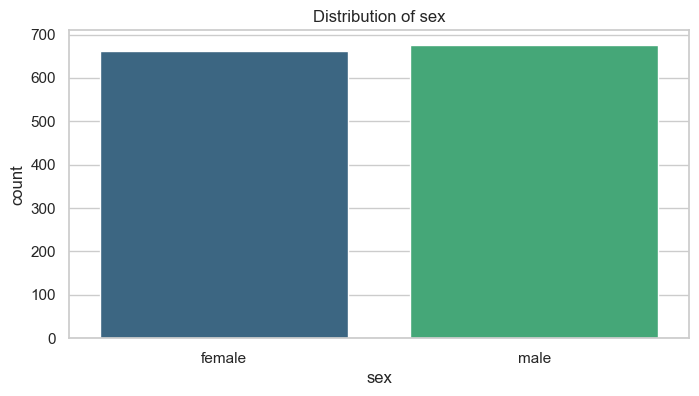

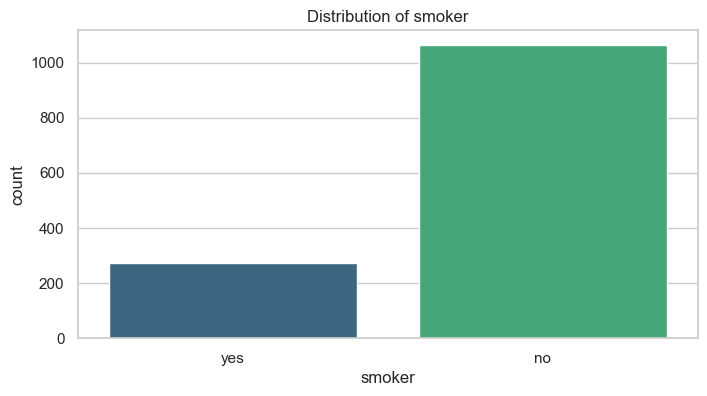

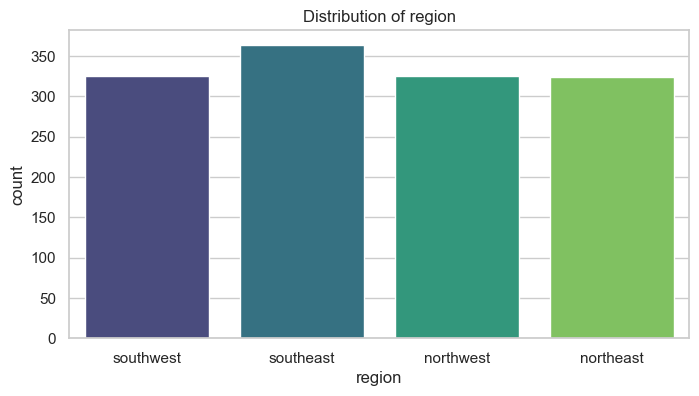

In [8]:
# Defining the categorical columns for visualization
categorical_cols = ['sex', 'smoker', 'region']

# Creating count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 4))  # Setting figure size
    sns.countplot(x=col, data=data, palette='viridis')  # Plotting countplot
    plt.title(f"Distribution of {col}")  # Adding a title
    plt.show()  # Displaying the plot

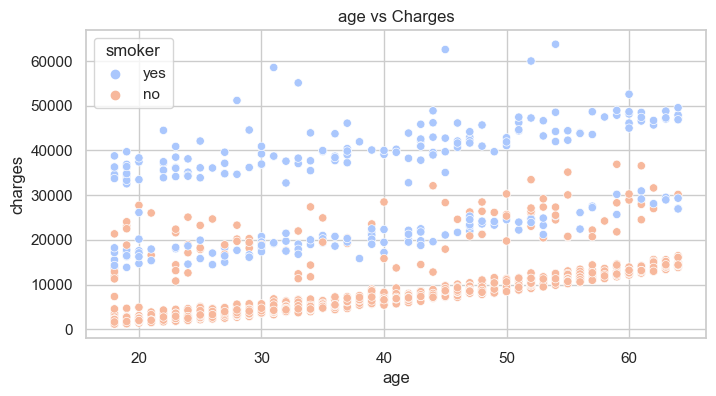

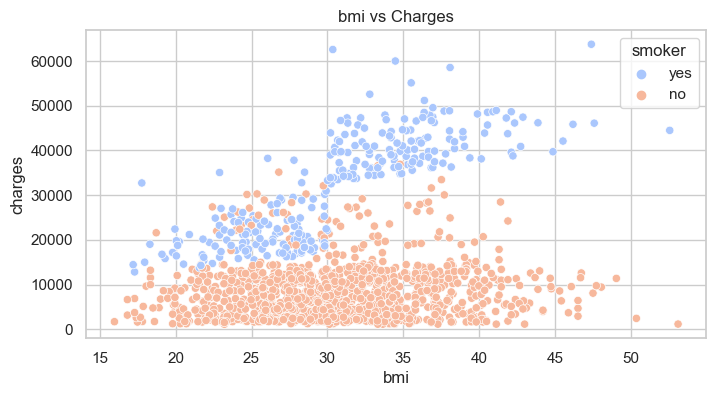

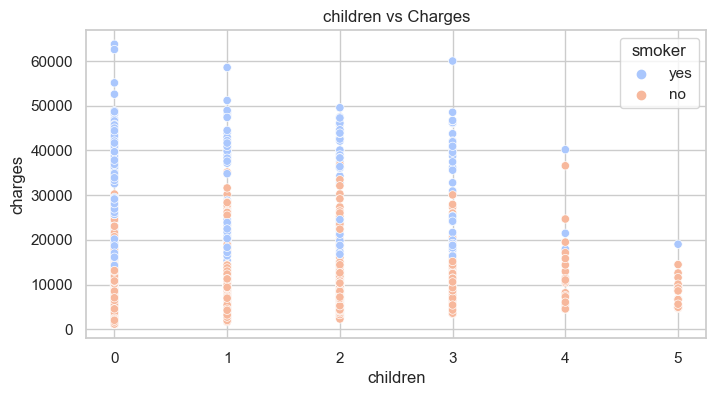

In [9]:
# Defining numerical columns for scatter plot analysis
numerical_cols = ['age', 'bmi', 'children']

# Creating scatter plots to visualize relationships between numerical columns and 'charges'
for col in numerical_cols:
    plt.figure(figsize=(8, 4))  # Setting figure size
    sns.scatterplot(x=col, y='charges', data=data, hue='smoker', palette='coolwarm')  # Plotting scatterplot
    plt.title(f"{col} vs Charges")  # Adding a title
    plt.show()  # Displaying the plot

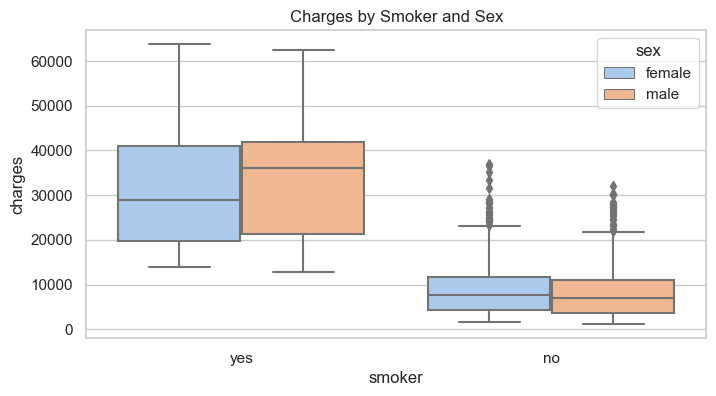

C:\Users\Yash Nagarkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


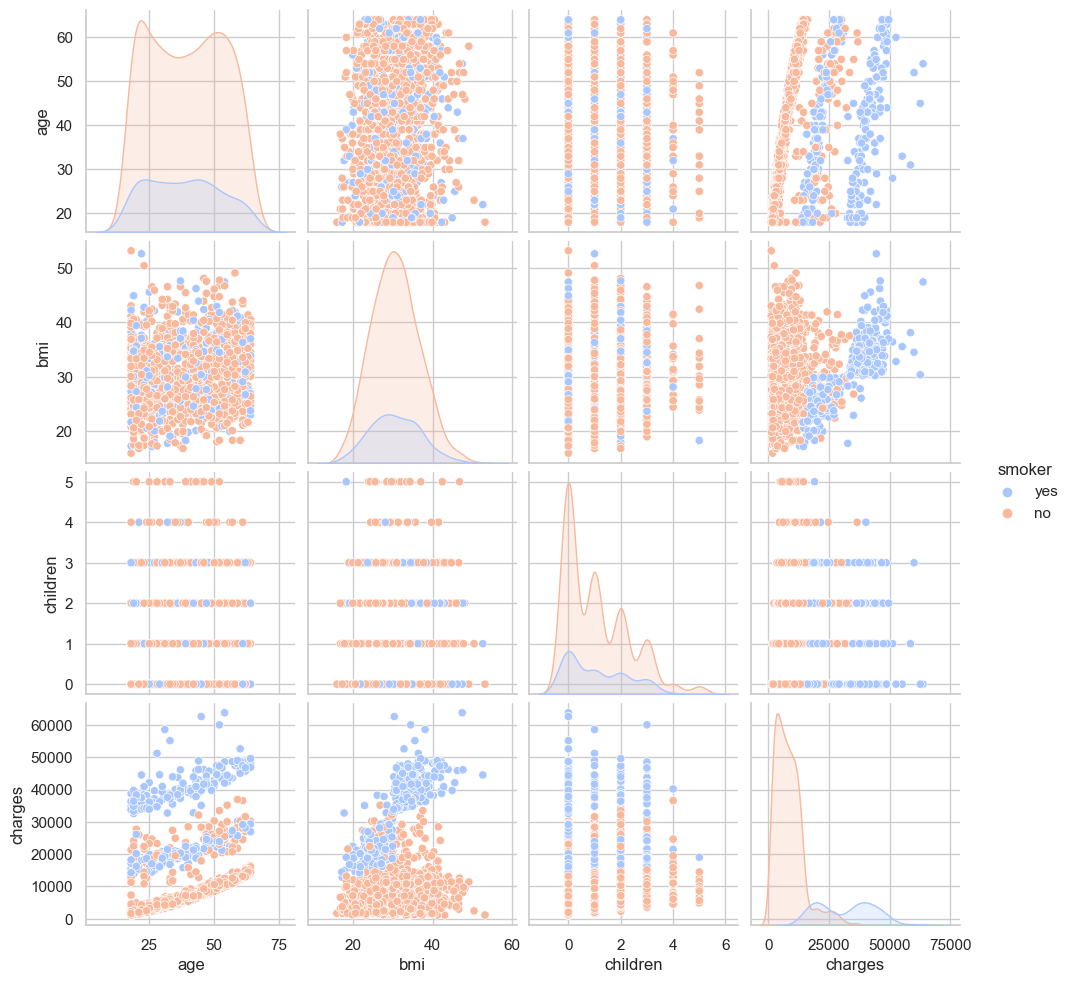

In [10]:
# Creating a boxplot to compare charges by smoker status and gender
plt.figure(figsize=(8, 4))  # Setting figure size
sns.boxplot(x='smoker', y='charges', hue='sex', data=data, palette='pastel')  # Plotting boxplot
plt.title("Charges by Smoker and Sex")  # Adding a title
plt.show()  # Displaying the plot

# Pairplot to visualize pairwise relationships and clusters based on smoker status
sns.pairplot(data, hue='smoker', palette='coolwarm')  # Creating pairplot
plt.show()  # Displaying the plot

C:\Users\Yash Nagarkar\AppData\Local\Temp\ipykernel_13232\2709076141.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y='charges', hue='smoker', data=data, palette='coolwarm', ci=None)  # Plotting lineplot


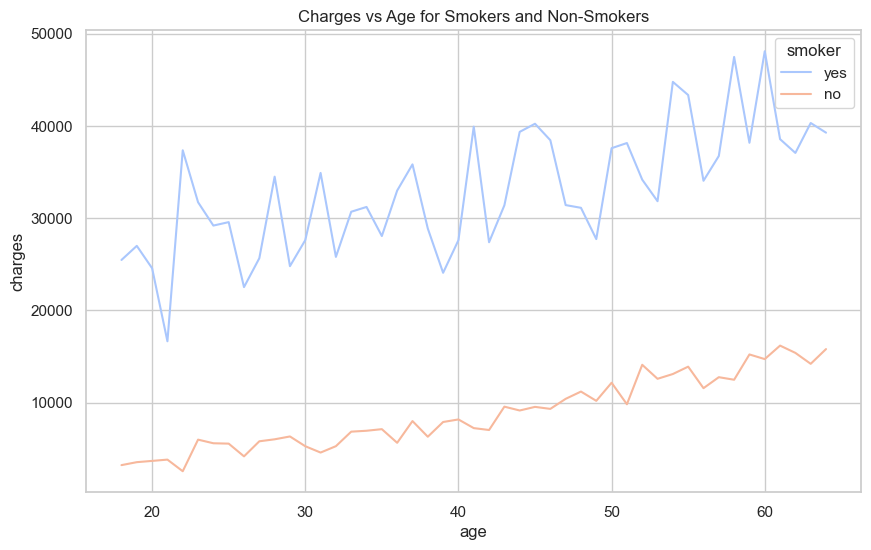

In [11]:
# Creating a line plot to analyze charges vs age for smokers and non-smokers
plt.figure(figsize=(10, 6))  # Setting figure size
sns.lineplot(x='age', y='charges', hue='smoker', data=data, palette='coolwarm', ci=None)  # Plotting lineplot
plt.title("Charges vs Age for Smokers and Non-Smokers")  # Adding a title
plt.show()  # Displaying the plot

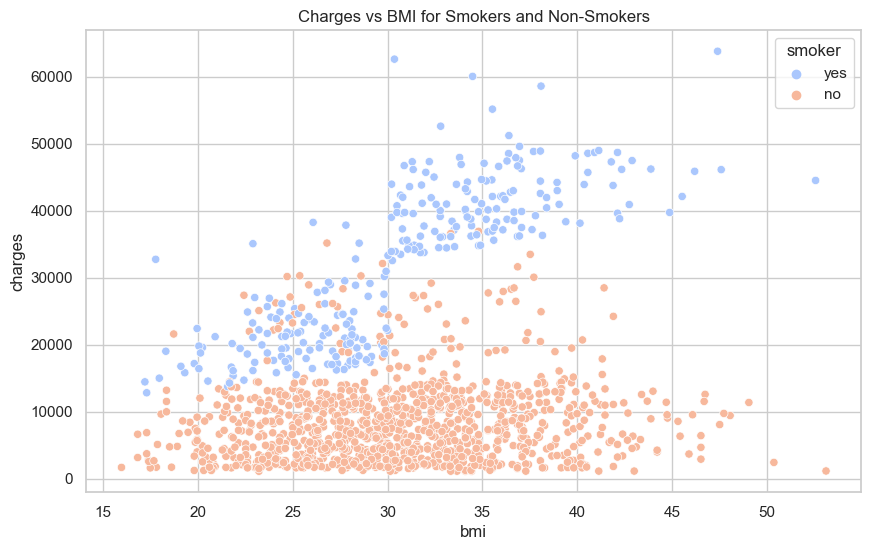

In [12]:
# Creating a scatter plot to analyze charges vs BMI for smokers and non-smokers
plt.figure(figsize=(10, 6))  # Setting figure size
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, palette='coolwarm')  # Plotting scatterplot
plt.title("Charges vs BMI for Smokers and Non-Smokers")  # Adding a title
plt.show()  # Displaying the plot

1. Categorical Variables
Smoking: Smokers have significantly higher charges than non-smokers, making smoking a key factor influencing premiums.
Region: Premiums show no major variation across regions.
Sex: Males and females have similar average insurance charges.

2. Numerical Variables
Age: Premiums increase with age, especially for smokers.
BMI: Higher BMI leads to higher charges, particularly among smokers.
Children: The number of children has little effect on insurance costs.

3. Feature Interactions
Smokers with high BMI and older age face the highest premiums.
Male smokers tend to have slightly higher charges than female smokers.

4. Dataset Integrity
No missing values; the dataset is complete and reliable.

 Insights for the Insurance Agency:
-Focus on smoking cessation programs to reduce claims.
-Offer plans tailored to older individuals and those with high BMI.
-Prioritize smoking and BMI over region or number of children in pricing strategies.

In [13]:
# Importing libraries for machine learning
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For creating the linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance

In [14]:
# Encoding categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Splitting the data into features (X) and target variable (y)
X = data_encoded.drop('charges', axis=1)  # Features
y = data_encoded['charges']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")  # Printing shapes of the splits

X_train: (1070, 8), X_test: (268, 8)


In [16]:
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics for the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Printing the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 33596915.851361446
R2 Score: 0.7835929767120724
